In [3]:
# Add your imports here
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab 
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

In [4]:
DATA_FOLDER = 'data'

### Loading Data

In [35]:
train_data = pd.read_csv(DATA_FOLDER +'/train.csv')
print("Number of rows:" + str(len(train_data)))
train_data.head(10)

Number of rows:250000


,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,...,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,...,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,...,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


### Exploring Data

In [5]:
print(train_data.info())
print("shape:" + str(train_data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
Id                             250000 non-null int64
Prediction                     250000 non-null object
DER_mass_MMC                   250000 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           250000 non-null float64
DER_mass_jet_jet               250000 non-null float64
DER_prodeta_jet_jet            250000 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         250000 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta 

In [34]:
#Description of the type and value range of each attribute
# train_data.Prediction = train_data.Prediction.astype('category')
# train_data.PRI_jet_num = train_data.PRI_jet_num.astype('category')
i = -2
for column in train_data:
    print(str(i) + "--" + column + "\n")    
    print("type: " + str(train_data[column].dtype))


    if train_data[column].dtype.name is "category":
        print(train_data[column].dtype.categories)
    else:
        print("min: " + str(train_data[column].min()))
        print("median: " + str(train_data[column].median()))
        print("max: " + str(train_data[column].max()))
    print("==========================")
    i +=1

-2--Id

type: int64
min: 100000
median: 224999.5
max: 349999
-1--Prediction

type: object
min: b


TypeError: could not convert string to float: 'b'

In [33]:
#descriptive statistics: total number of data points, mean, standard deviation, minimum value, 1st quartile (25%), median (50%), 3rd quartile (75%), maximum value for both variables 
train_data.describe().transpose().reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,Id,250000.0,224999.500000,72168.927986,100000.000,162499.75000,224999.5000,287499.25000,349999.000
1,DER_mass_MMC,250000.0,-49.023079,406.345647,-999.000,78.10075,105.0120,130.60625,1192.026
2,DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000,19.24100,46.5240,73.59800,690.075
3,DER_mass_vis,250000.0,81.181982,40.828691,6.329,59.38875,73.7520,92.25900,1349.351
4,DER_pt_h,250000.0,57.895962,63.655682,0.000,14.06875,38.4675,79.16900,2834.999
5,DER_deltaeta_jet_jet,250000.0,-708.420675,454.480565,-999.000,-999.00000,-999.0000,0.49000,8.503
6,DER_mass_jet_jet,250000.0,-601.237051,657.972302,-999.000,-999.00000,-999.0000,83.44600,4974.979
7,DER_prodeta_jet_jet,250000.0,-709.356603,453.019877,-999.000,-999.00000,-999.0000,-4.59300,16.690
8,DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208,1.81000,2.4915,2.96100,5.684
9,DER_pt_tot,250000.0,18.917332,22.273494,0.000,2.84100,12.3155,27.59100,2834.999


In [36]:
train_data['Prediction'] = train_data['Prediction'].map({'s': 1, 'b': -1})
train_data.corr()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,1.000000,0.002248,0.001917,-0.006059,-0.001851,0.002073,-0.000060,0.000353,-0.000075,-0.001349,...,-0.001141,0.002312,0.000175,0.001396,0.001216,0.001214,-0.000065,-0.000068,-0.000060,0.001024
Prediction,0.002248,1.000000,0.239149,-0.351428,-0.014055,0.192526,0.141646,0.191766,0.140554,0.012245,...,0.007475,0.135520,0.133549,0.157604,0.150469,0.150468,0.140714,0.141265,0.141256,0.134296
DER_mass_MMC,0.001917,0.239149,1.000000,-0.455755,0.168548,0.198765,0.162661,0.160524,0.162521,0.228105,...,0.007411,0.221984,0.221078,0.250158,0.247083,0.247078,0.162836,0.162614,0.162609,0.185372
DER_mass_transverse_met_lep,-0.006059,-0.351428,-0.455755,1.000000,0.190109,-0.249116,-0.176386,-0.190392,-0.175942,0.043251,...,-0.015925,-0.167811,-0.210537,-0.229674,-0.220370,-0.220355,-0.176837,-0.176231,-0.176225,-0.210009
DER_mass_vis,-0.001851,-0.014055,0.168548,0.190109,1.000000,-0.062562,-0.032251,-0.040620,-0.032126,0.579712,...,-0.001467,0.053300,-0.026860,-0.019151,-0.013749,-0.013742,-0.033188,-0.032202,-0.032206,-0.052902
DER_pt_h,0.002073,0.192526,0.198765,-0.249116,-0.062562,1.000000,0.523664,0.534531,0.523639,-0.539379,...,0.008585,0.782547,0.623401,0.621599,0.564898,0.564894,0.531647,0.523714,0.523703,0.808616
DER_deltaeta_jet_jet,-0.000060,0.141646,0.162661,-0.176386,-0.032251,0.523664,1.000000,0.946045,0.999981,-0.299076,...,0.005245,0.619100,0.867521,0.545027,0.521657,0.521664,0.999346,0.999995,0.999996,0.712446
DER_mass_jet_jet,0.000353,0.191766,0.160524,-0.190392,-0.040620,0.534531,0.946045,1.000000,0.944443,-0.303751,...,0.005167,0.617057,0.814191,0.521645,0.493233,0.493241,0.947652,0.945505,0.945507,0.719962
DER_prodeta_jet_jet,-0.000075,0.140554,0.162521,-0.175942,-0.032126,0.523639,0.999981,0.944443,1.000000,-0.299083,...,0.005254,0.619388,0.867741,0.545022,0.521653,0.521661,0.999347,0.999988,0.999989,0.712620
DER_deltar_tau_lep,-0.001349,0.012245,0.228105,0.043251,0.579712,-0.539379,-0.299076,-0.303751,-0.299083,1.000000,...,-0.001570,-0.407002,-0.347904,-0.335851,-0.304161,-0.304145,-0.303416,-0.299107,-0.299101,-0.448737


{'whiskers': [<matplotlib.lines.Line2D at 0x13f5572e8>,
 'caps': [<matplotlib.lines.Line2D at 0x13f557978>,
 'boxes': [<matplotlib.lines.Line2D at 0x13f557198>],
 'medians': [<matplotlib.lines.Line2D at 0x13f55f048>],
 'fliers': [<matplotlib.lines.Line2D at 0x13f55f390>],
 'means': []}

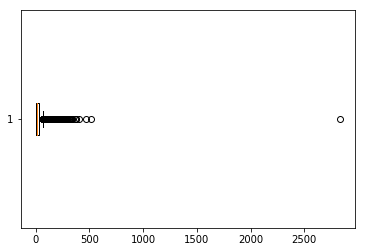

In [18]:
matplotlib.pyplot.boxplot([train_data.DER_pt_tot], vert=False)

In [10]:
train_data['PRI_met'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0       0.1090
0.1      12.3729
0.2      18.6000
0.3      24.0950
0.4      29.3530
0.5      34.8020
0.6      40.6810
0.7      47.6703
0.8      57.1090
0.9      76.0941
1.0    2842.6170
Name: PRI_met, dtype: float64

In [20]:
train_data = train_data.sort_values(by=['DER_pt_tot'])
train_data.DER_pt_tot.tail(10)

150470     330.527
229572     333.579
123136     334.889
102939     361.311
124647     371.876
64683      372.721
119860     403.195
177568     466.525
42689      513.659
7343      2834.999
Name: DER_pt_tot, dtype: float64

In [32]:
fig, ax = plt.subplots()
ax.plot(train_data.DER_mass_MMC)

ax.grid()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x119be0f28> (for post_execute):


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

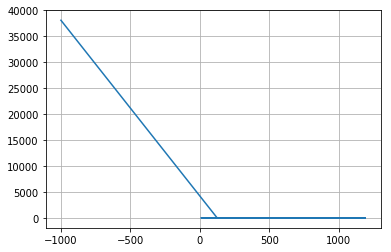

In [31]:
fig, ax = plt.subplots()
ax.plot(train_data.DER_mass_MMC.value_counts())

ax.grid()

In [16]:
#Find correlation between columns
train_data.corr(method='pearson', min_periods=1)

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,1.000000,0.001917,-0.006059,-0.001851,0.002073,-0.000060,0.000353,-0.000075,-0.001349,-0.000581,...,-0.001141,0.002312,0.000175,0.001396,0.001216,0.001214,-0.000065,-0.000068,-0.000060,0.001024
DER_mass_MMC,0.001917,1.000000,-0.455755,0.168548,0.198765,0.162661,0.160524,0.162521,0.228105,0.045826,...,0.007411,0.221984,0.221078,0.250158,0.247083,0.247078,0.162836,0.162614,0.162609,0.185372
DER_mass_transverse_met_lep,-0.006059,-0.455755,1.000000,0.190109,-0.249116,-0.176386,-0.190392,-0.175942,0.043251,0.017758,...,-0.015925,-0.167811,-0.210537,-0.229674,-0.220370,-0.220355,-0.176837,-0.176231,-0.176225,-0.210009
DER_mass_vis,-0.001851,0.168548,0.190109,1.000000,-0.062562,-0.032251,-0.040620,-0.032126,0.579712,-0.000702,...,-0.001467,0.053300,-0.026860,-0.019151,-0.013749,-0.013742,-0.033188,-0.032202,-0.032206,-0.052902
DER_pt_h,0.002073,0.198765,-0.249116,-0.062562,1.000000,0.523664,0.534531,0.523639,-0.539379,0.310501,...,0.008585,0.782547,0.623401,0.621599,0.564898,0.564894,0.531647,0.523714,0.523703,0.808616
DER_deltaeta_jet_jet,-0.000060,0.162661,-0.176386,-0.032251,0.523664,1.000000,0.946045,0.999981,-0.299076,0.270878,...,0.005245,0.619100,0.867521,0.545027,0.521657,0.521664,0.999346,0.999995,0.999996,0.712446
DER_mass_jet_jet,0.000353,0.160524,-0.190392,-0.040620,0.534531,0.946045,1.000000,0.944443,-0.303751,0.247771,...,0.005167,0.617057,0.814191,0.521645,0.493233,0.493241,0.947652,0.945505,0.945507,0.719962
DER_prodeta_jet_jet,-0.000075,0.162521,-0.175942,-0.032126,0.523639,0.999981,0.944443,1.000000,-0.299083,0.271435,...,0.005254,0.619388,0.867741,0.545022,0.521653,0.521661,0.999347,0.999988,0.999989,0.712620
DER_deltar_tau_lep,-0.001349,0.228105,0.043251,0.579712,-0.539379,-0.299076,-0.303751,-0.299083,1.000000,-0.148081,...,-0.001570,-0.407002,-0.347904,-0.335851,-0.304161,-0.304145,-0.303416,-0.299107,-0.299101,-0.448737
DER_pt_tot,-0.000581,0.045826,0.017758,-0.000702,0.310501,0.270878,0.247771,0.271435,-0.148081,1.000000,...,0.002515,0.448925,0.360409,0.202920,0.186564,0.186590,0.279203,0.271100,0.271091,0.403382


In [21]:
test_data = pd.read_csv(DATA_FOLDER +'/test.csv')
print("Number of rows:" + str(len(test_data)))
test_data.head(10)

Number of rows:568238


,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,?,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
1,350001,?,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,?,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,?,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,?,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213
5,350005,?,95.709,94.168,66.280,14.719,-999.000,-999.000,-999.000,3.065,...,2.566,86.129,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
6,350006,?,85.798,49.059,66.131,37.074,-999.000,-999.000,-999.000,2.253,...,3.060,98.461,1,36.990,-3.277,1.369,-999.000,-999.000,-999.000,36.990
7,350007,?,429.273,75.057,234.610,71.019,0.590,174.261,2.278,4.287,...,1.722,274.193,2,119.440,1.243,-0.739,59.619,1.833,2.788,179.059
8,350008,?,70.958,66.329,60.950,0.758,-999.000,-999.000,-999.000,2.370,...,-1.389,102.088,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,350009,?,110.539,2.820,62.136,179.753,3.256,337.201,-2.059,1.092,...,-0.794,361.566,2,115.867,-0.859,1.961,40.427,2.397,1.479,156.294


In [18]:
x = train_data.groupby(['PRI_jet_num'], axis=0).min()
x.transpose()

PRI_jet_num,0,1,2,3
Id,100003,100001,100000,100005
Prediction,b,b,b,b
DER_mass_MMC,-999,-999,-999,-999
DER_mass_transverse_met_lep,0.002,0,0,0
DER_mass_vis,7.12,6.329,7.33,10.342
DER_pt_h,0,0,0.12,0.777
DER_deltaeta_jet_jet,-999,-999,0,0
DER_mass_jet_jet,-999,-999,13.602,17.084
DER_prodeta_jet_jet,-999,-999,-18.066,-15.347
DER_deltar_tau_lep,0.277,0.208,0.228,0.379


In [32]:
x_mean = train_data.groupby(['PRI_jet_num'], axis=0).mean()
x_mean.transpose().reset_index()

PRI_jet_num,index,0,1,2,3
0,Id,224892.549558,225144.066040,225129.697374,224679.896003
1,DER_mass_MMC,-172.077816,12.845744,56.928924,48.407703
2,DER_mass_transverse_met_lep,58.786239,46.053600,38.343612,42.120203
3,DER_mass_vis,81.870309,82.219033,79.213348,78.925522
4,DER_pt_h,13.823867,65.903090,102.985028,126.066343
5,DER_deltaeta_jet_jet,-999.000000,-999.000000,2.606534,1.942770
6,DER_mass_jet_jet,-999.000000,-999.000000,391.406450,327.179877
7,DER_prodeta_jet_jet,-999.000000,-999.000000,-1.115458,-0.153947
8,DER_deltar_tau_lep,2.664961,2.339686,2.060607,1.884620
9,DER_pt_tot,13.823867,16.645000,17.280603,53.548536


In [31]:
x_mean = test_data.groupby(['PRI_jet_num'], axis=0).count()/len(test_data.index)
x_mean.transpose()

PRI_jet_num,0,1,2,3
Id,0.400286,0.308564,0.201761,0.089389
Prediction,0.400286,0.308564,0.201761,0.089389
DER_mass_MMC,0.400286,0.308564,0.201761,0.089389
DER_mass_transverse_met_lep,0.400286,0.308564,0.201761,0.089389
DER_mass_vis,0.400286,0.308564,0.201761,0.089389
DER_pt_h,0.400286,0.308564,0.201761,0.089389
DER_deltaeta_jet_jet,0.400286,0.308564,0.201761,0.089389
DER_mass_jet_jet,0.400286,0.308564,0.201761,0.089389
DER_prodeta_jet_jet,0.400286,0.308564,0.201761,0.089389
DER_deltar_tau_lep,0.400286,0.308564,0.201761,0.089389
